In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# df = pd.read_csv("data/aug/data_aug_2024-03-25.csv")

In [3]:
df = pd.read_csv("data/knn/data_knn_2024-03-25.csv")
df_dem = pd.read_csv("data/LocalLogic/Demographics/demographics_for_2024-03-25.csv")
df_loc = pd.read_csv("data/LocalLogic/Locations/locations_for_2024-03-25.csv")



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90765 entries, 0 to 90764
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                90765 non-null  int64  
 1   id                        90765 non-null  int64  
 2   id_mls                    90765 non-null  object 
 3   bathrooms_total           90765 non-null  float64
 4   bedrooms_extra            90765 non-null  float64
 5   bedrooms                  90765 non-null  float64
 6   stories_total             90765 non-null  float64
 7   size_interior             90765 non-null  float64
 8   building_type             90765 non-null  object 
 9   agency_name               90765 non-null  object 
 10  agency_type               90765 non-null  object 
 11  property_type             90765 non-null  object 
 12  lng                       90765 non-null  float64
 13  lat                       90765 non-null  float64
 14  owners

In [5]:
df = pd.merge(df, df_dem, on="id")
df = pd.merge(df, df_loc, on="id")

In [6]:
# url = "https://realtor.ca/real-estate/26631578/3855-southwinds-unit-403-windsor"
# df.loc[df["page_url"] == url, "size_interior"] = 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90765 entries, 0 to 90764
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  90765 non-null  int64  
 1   id                          90765 non-null  int64  
 2   id_mls                      90765 non-null  object 
 3   bathrooms_total             90765 non-null  float64
 4   bedrooms_extra              90765 non-null  float64
 5   bedrooms                    90765 non-null  float64
 6   stories_total               90765 non-null  float64
 7   size_interior               90765 non-null  float64
 8   building_type               90765 non-null  object 
 9   agency_name                 90765 non-null  object 
 10  agency_type                 90765 non-null  object 
 11  property_type               90765 non-null  object 
 12  lng                         90765 non-null  float64
 13  lat                         907

# First Glance

In [8]:
df.head()

,Unnamed: 0,id,id_mls,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
0,0,26639235,24005541,3.0,0.0,4.0,2.5,2810.000000,House,RE/MAX PREFERRED REALTY LTD. - 585,...,0.0,3.5,3.0,1.5,2.5,5.0,2.0,3.0,5.0,3.5
1,1,26639230,24005774,2.0,0.0,2.0,1.0,1072.000000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,...,0.0,3.0,4.5,1.0,3.0,4.5,0.5,1.5,4.5,3.5
2,2,26639229,24005776,3.0,0.0,4.0,2.0,1965.881818,House,RE/MAX CAPITAL DIAMOND REALTY - 821,...,0.0,2.5,4.0,0.5,1.0,5.0,0.0,1.0,5.0,0.0
3,3,26639225,24005786,1.0,0.0,4.0,1.0,1040.426146,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,...,0.0,3.5,3.5,2.0,2.0,4.0,2.0,2.5,3.0,3.5
4,4,26638941,24005778,2.0,0.0,2.0,1.0,1100.000000,Apartment,PINNACLE PLUS REALTY LTD.,...,0.0,3.0,5.0,0.5,2.0,5.0,0.0,1.0,3.5,0.0


In [9]:
df["province"].value_counts()

province
Ontario                    31283
Quebec                     19217
British Columbia           18982
Alberta                    10735
Saskatchewan                3646
Manitoba                    2428
Nova Scotia                 2150
New Brunswick               1237
Newfoundland & Labrador      504
Prince Edward Island         447
Yukon                         87
Northwest Territories         49
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,Unnamed: 0,id,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
count,90765.0,90765.0,90765.0,90765.0,90765.0,90765.0,90765.0,90765.0,90765.0,90765.0,...,90691.0,90691.0,90691.0,90691.0,90691.0,90691.0,90691.0,90691.0,90691.0,90691.0
mean,45382.0,26453714.0,2.0,0.0,3.0,1.0,5688.0,-92.0,47.0,1.0,...,0.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0
std,26202.0,298509.0,1.0,0.0,1.0,1.0,317042.0,21.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
min,0.0,20535215.0,0.0,0.0,0.0,1.0,1.0,-139.0,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,22691.0,26413921.0,1.0,0.0,2.0,1.0,1113.0,-114.0,44.0,1.0,...,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
50%,45382.0,26552970.0,2.0,0.0,3.0,1.0,1600.0,-80.0,46.0,1.0,...,0.0,2.0,4.0,0.0,2.0,2.0,0.0,2.0,4.0,0.0
75%,68073.0,26618720.0,3.0,0.0,4.0,2.0,2565.0,-75.0,49.0,1.0,...,0.0,3.0,5.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0
max,90764.0,26664481.0,7.0,2.0,8.0,3.0,90703862.0,-53.0,69.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


## Removing Unwanted Features

In [11]:
df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90765 entries, 0 to 90764
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  90765 non-null  int64  
 1   bathrooms_total             90765 non-null  float64
 2   bedrooms_extra              90765 non-null  float64
 3   bedrooms                    90765 non-null  float64
 4   stories_total               90765 non-null  float64
 5   size_interior               90765 non-null  float64
 6   building_type               90765 non-null  object 
 7   lng                         90765 non-null  float64
 8   lat                         90765 non-null  float64
 9   ownership_type_group_ids    90765 non-null  int64  
 10  parkings                    90765 non-null  float64
 11  province                    90765 non-null  object 
 12  price                       90765 non-null  float64
 13  household_income            898

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

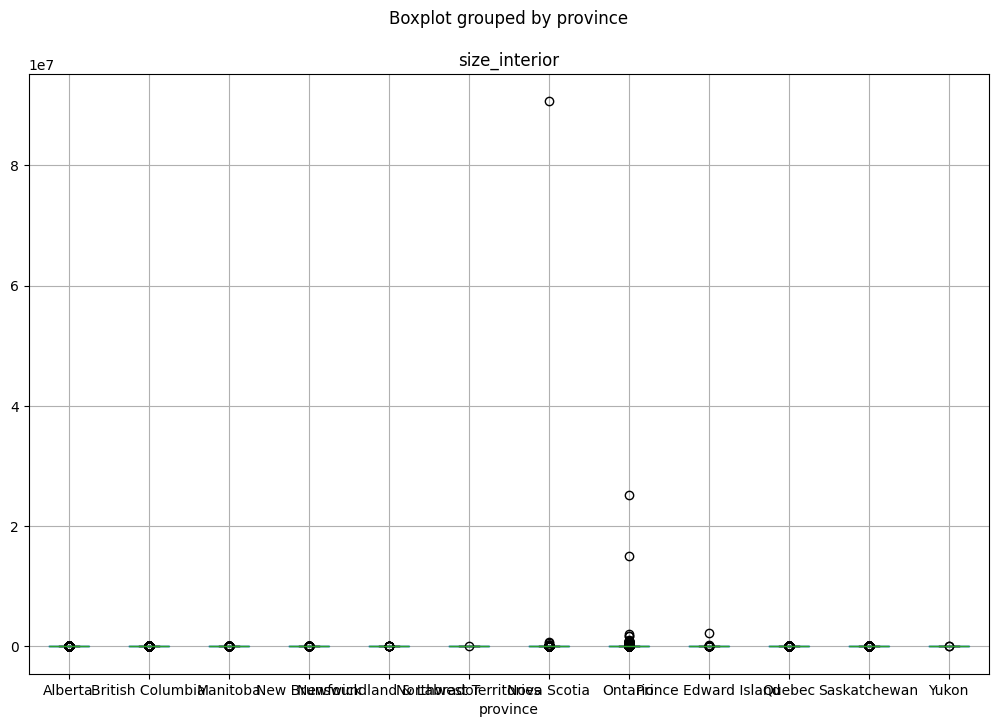

In [12]:
df.boxplot(column="size_interior", by="province", figsize=(12,8))

In [13]:
# for province in df["province"].unique():
#     for building_type in df["building_type"].unique():

#         mask = (df["province"] == province) & (df["building_type"] == building_type)
#         # mask = (df_norm["province"] == province)

#         q1 = df[mask]["size_interior"].quantile(0.25)
#         q3 = df[mask]["size_interior"].quantile(0.75)
#         iqr = q3 - q1

#         # remove outliers
#         df[mask] = df[mask][df[mask]["size_interior"]<=abs(q3+1.5*iqr)]

#         df_szie = df[df["size_interior"].notna()]

In [14]:
q1 = df["size_interior"].quantile(0.25)
q3 = df["size_interior"].quantile(0.75)
iqr = q3 - q1

df = df[df["size_interior"] < (q3+1.5*iqr)]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

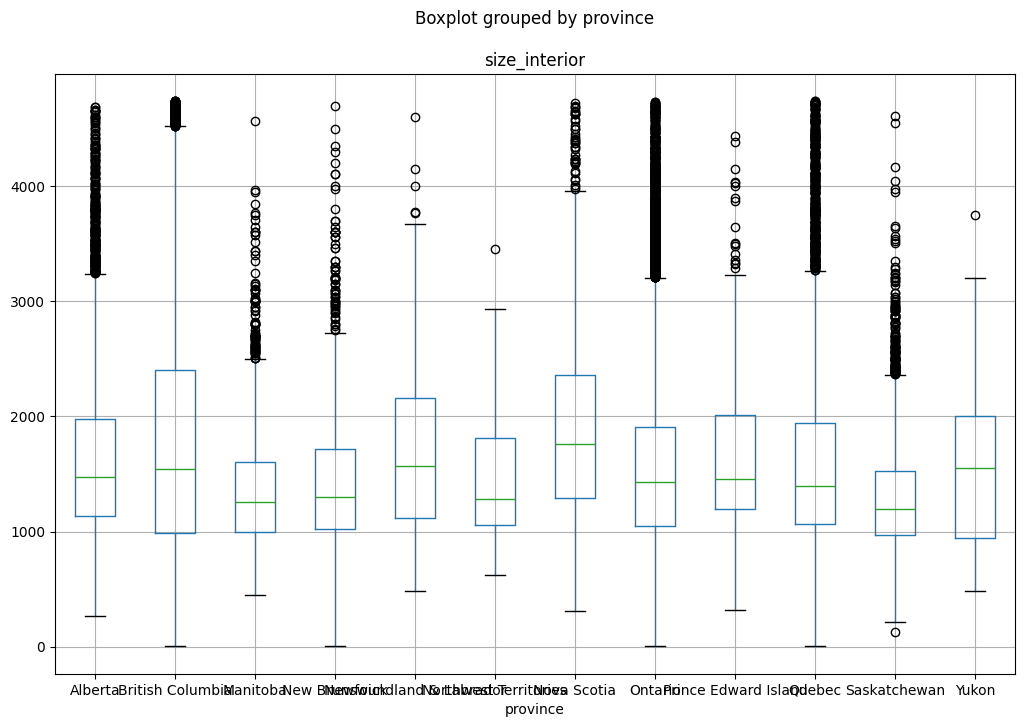

In [15]:
df.boxplot(column="size_interior", by="province", figsize=(12,8))

In [16]:
df_enc = pd.get_dummies(df[df["province"] == "Ontario"])
df_enc.shape

(30081, 73)

In [18]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30081 entries, 0 to 88604
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     30081 non-null  int64  
 1   bathrooms_total                30081 non-null  float64
 2   bedrooms_extra                 30081 non-null  float64
 3   bedrooms                       30081 non-null  float64
 4   stories_total                  30081 non-null  float64
 5   size_interior                  30081 non-null  float64
 6   lng                            30081 non-null  float64
 7   lat                            30081 non-null  float64
 8   ownership_type_group_ids       30081 non-null  int64  
 9   parkings                       30081 non-null  float64
 10  price                          30081 non-null  float64
 11  household_income               29930 non-null  float64
 12  individual_income              29930 non-null  floa

In [19]:
from sklearn. preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(df_enc.drop("price", axis=1))
y_scaled = scaler_y.fit_transform(np.array(df_enc["price"]).reshape(-1,1))

In [20]:
df_enc.corr(numeric_only=True)["price"].sort_values(ascending=False).head(20)

price                         1.000000
bathrooms_total               0.522753
size_interior                 0.490019
individual_income             0.468507
household_income              0.468507
bedrooms                      0.361812
parkings                      0.335394
building_type_House           0.265315
single_family                 0.246708
edu_bachelor_degree           0.240225
edu_university_certificate    0.226229
stories_total                 0.223122
bedrooms_extra                0.209176
edu_post_graduate_degree      0.204270
owners                        0.202533
area_single_detached          0.160570
age_15_to_19                  0.158576
age_50_to_64                  0.137552
loc_greenery                  0.137317
multi_family                  0.136334
Name: price, dtype: float64

In [21]:
from sklearn.model_selection import cross_val_score, KFold


In [22]:
kf = KFold(n_splits=5)

In [23]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(max_depth=5)

In [24]:
cross_val_score(rf, X_scaled, y_scaled, cv=kf, scoring="r2")

/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soheil/codes/House-Pred-CA/House-Pred-CA/.venv/lib64/python3.12/sit

array([0.25721683, 0.56540321, 0.45701671, 0.16748808, 0.42837986])

In [25]:
from xgboost import XGBRegressor

In [26]:
xgb = XGBRegressor()

In [27]:
cross_val_score(xgb, X_scaled, y_scaled, cv=kf, scoring="r2")

array([0.29456076, 0.69257012, 0.54355026, 0.35128635, 0.56399223])

In [28]:
xgb.fit(X_scaled, y_scaled)
y_pred = xgb.predict(X_scaled)

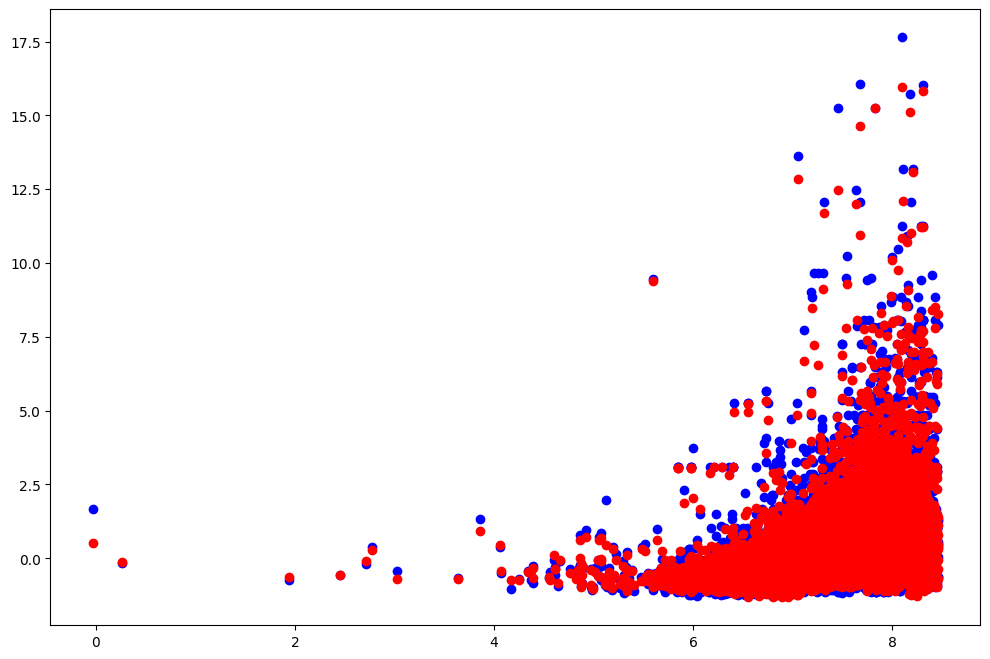

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(np.log(df_enc["size_interior"]), y_scaled, c="blue")
plt.scatter(np.log(df_enc["size_interior"]), y_pred, c="red")

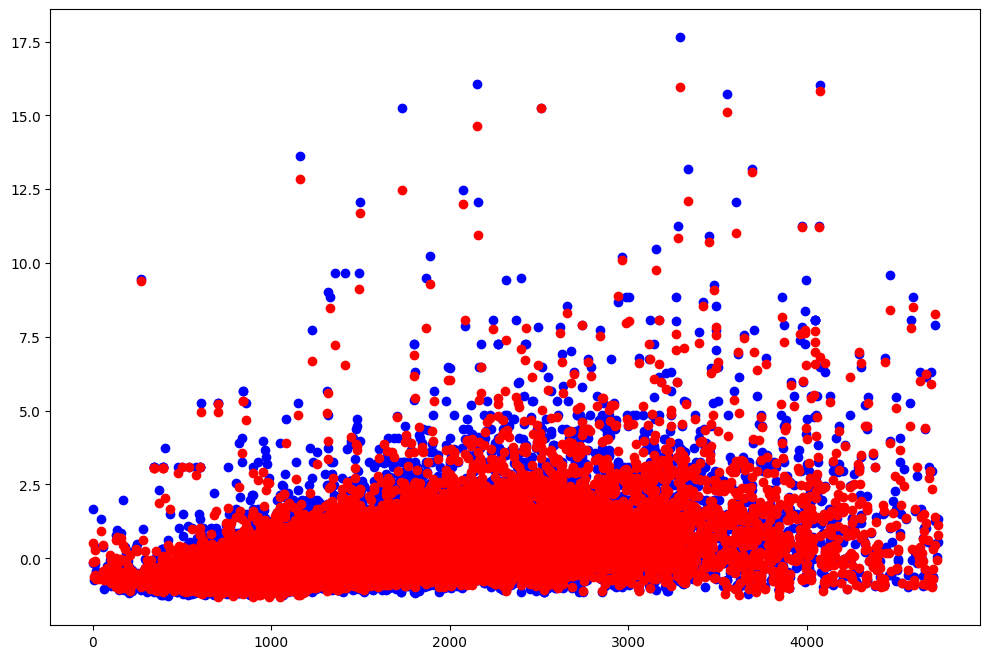

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df_enc["size_interior"], y_scaled, c="blue")
plt.scatter(df_enc["size_interior"], y_pred, c="red")

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [32]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7151408585938617

In [34]:
X_train.shape

(24064, 72)

In [37]:
df_enc[(df_enc["household_income"].notna()) & df_enc["loc_parks"].notna()].shape

(29905, 73)

In [ ]:
# We therefore conclude that XGBoost and RandomForest Ignore the samples with NA